In [2]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**DATA CLEANING**

In [3]:
# Fungsi untuk membaca dataset dalam mode tekstual dan membersihkan data yang rusak
def read_clean_csv(file_path):
    rows = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        for row in reader:
            if len(row) == len(header):  # Memastikan jumlah kolom sesuai dengan header
                rows.append(row)
    return pd.DataFrame(rows, columns=header)


In [4]:
# Membaca dan membersihkan dataset
data = read_clean_csv("D:/shaff/kuliah/#semester4/machine learning/IMDB Dataset.csv")

# Membersihkan Dataset
data = data.drop_duplicates()  # Menghapus data duplikat
data = data.dropna()  # Menghapus baris dengan data yang tidak lengkap
data['review'] = data['review'].str.lower()  # Mengonversi teks ulasan menjadi huruf kecil


In [5]:
# Menampilkan beberapa baris pertama dari dataset untuk memastikan berhasil dibaca
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [6]:
# Menampilkan informasi dataset untuk memastikan pembersihan berhasil
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


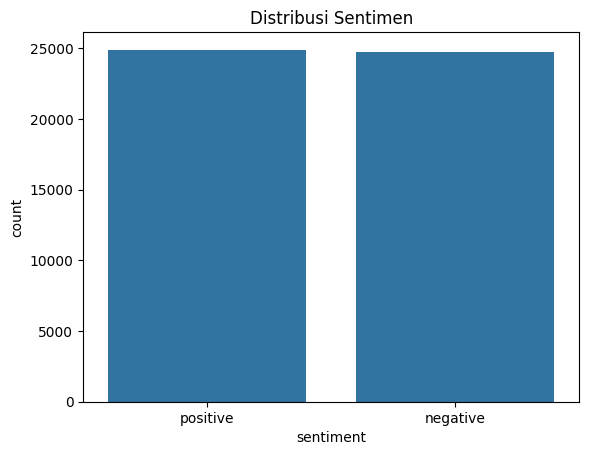

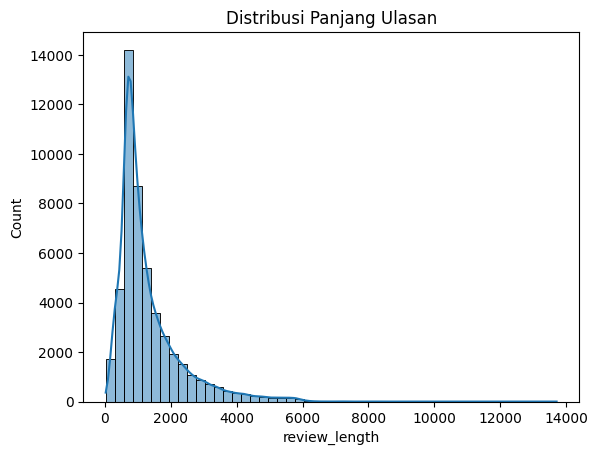

In [7]:

# Distribusi sentimen
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Sentimen')
plt.show()

# Panjang ulasan
data['review_length'] = data['review'].apply(len)
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Ulasan')
plt.show()

**TRAINING MODEL**

In [8]:
# Membagi data menjadi fitur (X) dan label (y)
X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [9]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Mengonversi teks menjadi fitur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [12]:
# Memprediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8883735000504185
Confusion Matrix:
 [[4328  611]
 [ 496 4482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [13]:
# Grid Search untuk optimasi hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.3s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.2s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.4s
[CV] END ............................C=0.1, solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [14]:

# Hasil terbaik
print("hasil terbaik")
print(grid.best_params_)
print(grid.best_estimator_)

hasil terbaik
{'C': 1, 'solver': 'newton-cg'}
LogisticRegression(C=1, solver='newton-cg')
